# Probabilities of dice totals
    by Gerrit Nowald
In the boardgame [The Settlers of Catan](https://simple.wikipedia.org/wiki/The_Settlers_of_Catan), the ressources are distributed based on the total of two 6-sided dice. The total 7 moves the bandit, which is used to steal ressources from other players. The other totals, ranging from 2 to 12, allow players to gain ressources.

To get the probability of a dice total, the number it occurs is divided by the number of all possible combinations. E.g. for two 6-sided dice, there are a total of 6*6=36 possible combinations.

This Notebook shows a Python implementation to calculate and plot the probability distribution for all dice totals, which is also applicable to arbitrary many, arbitrary-sided dice.

See also this blog post: https://gerritnowald.wordpress.com/2022/04/20/probabilities-of-dice-totals/

In [1]:
import itertools
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.ticker import MaxNLocator

## input: sides of dice

In [2]:
dice = [6, 6]

## calculation
- list of lists of all possible eyes for each die:

In [3]:
eyes = [ [eye+1 for eye in range(die)] for die in dice ]
print(eyes)

[[1, 2, 3, 4, 5, 6], [1, 2, 3, 4, 5, 6]]


- all possible result combinations:

In [8]:
combinations = list(itertools.product(*eyes))
print(combinations)

[(1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5), (5, 6), (6, 1), (6, 2), (6, 3), (6, 4), (6, 5), (6, 6)]


- dice total for each combination:

In [9]:
dicetotal = [sum(combination) for combination in combinations]
print(dicetotal)

[2, 3, 4, 5, 6, 7, 3, 4, 5, 6, 7, 8, 4, 5, 6, 7, 8, 9, 5, 6, 7, 8, 9, 10, 6, 7, 8, 9, 10, 11, 7, 8, 9, 10, 11, 12]


- probability distribution:

In [6]:
N = np.histogram(dicetotal, bins = np.arange(min(dicetotal), min(dicetotal) + len(set(dicetotal)) + 1), density=True)

## plot probability distribution

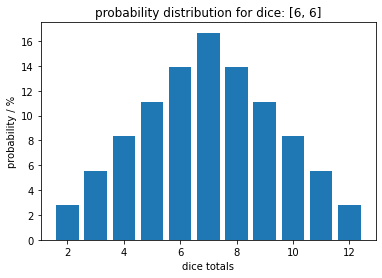

In [11]:
ax = plt.figure().gca()
plt.bar(N[1][:-1], N[0]*100, width=0.8)
plt.title(f'probability distribution for dice: {dice}')
plt.xlabel('dice totals')
plt.ylabel('probability / %')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))   # integer ticks

The probability is highest for the total 7 and decreases towards the extreme values. The probability distribution is symmetrical, e.g. getting a total of 4 is equally likely as getting a total of 10.